In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import fileinput
import seaborn as sns


In [189]:
train1 = pd.read_csv("/Users/tientran/Downloads/HousePricePrediction/train1.csv")
train1.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [190]:
train1.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [191]:
train1.isna().sum()    # Find total of missing values
        

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [192]:
train1.head()


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [193]:
# Converting acre to sqft

def acre_to_sqft(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']


train1['lot_size'] = train1.apply(acre_to_sqft, axis = 1)

In [194]:
train1.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [195]:
train1.value_counts()     # This is to check how many values are in each column


beds  baths  size     size_units  lot_size  lot_size_units  zip_code  price    
1     1.0    376.0    sqft        10018.8   acre            98199     1000000.0    4
2     2.0    1332.0   sqft        1101.0    sqft            98199     845000.0     2
3     3.0    1880.0   sqft        2200.0    sqft            98107     999950.0     2
      2.5    1810.0   sqft        1436.0    sqft            98107     1000000.0    2
2     2.0    1170.0   sqft        588.0     sqft            98144     624999.0     2
                                                                                  ..
3     1.0    2180.0   sqft        10890.0   acre            98125     720000.0     1
             2160.0   sqft        5100.0    sqft            98115     920000.0     1
             2130.0   sqft        3710.0    sqft            98117     850000.0     1
             1964.0   sqft        9050.0    sqft            98168     625000.0     1
15    6.0    11010.0  sqft        14374.8   acre            98112     

In [196]:
# Fill NaN in lot_size with 'mean'

from sklearn.impute import SimpleImputer

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('train1.csv')

# Create a SimpleImputer object with strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'lot_size' column
df['lot_size'] = imputer.fit_transform(df[['lot_size']])



# Save the updated DataFrame to a new CSV file
df.to_csv('train1_imputed.csv', index=False)

In [197]:
train1_imputed = pd.read_csv("/Users/tientran/Downloads/HousePricePrediction/train1_imputed.csv")

In [198]:
train1_imputed = train1_imputed.drop(['size_units', 'lot_size_units'], axis=1)
train1_imputed.head()


,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.000000,98144,795000.0
1,4,2.0,2240.0,0.310000,98106,915000.0
2,4,3.0,2040.0,3783.000000,98107,950000.0
3,4,3.0,3800.0,5175.000000,98199,1950000.0
4,2,2.0,1042.0,3871.059694,98102,950000.0


In [199]:
train1_imputed.value_counts()

beds  baths  size     lot_size     zip_code  price    
1     1.0    376.0    0.230000     98199     1000000.0    4
3     2.5    1810.0   1436.000000  98107     1000000.0    2
2     2.0    1020.0   776.000000   98118     605000.0     2
             1170.0   588.000000   98144     624999.0     2
             1200.0   1247.000000  98122     705000.0     2
                                                         ..
             1415.0   3871.059694  98125     469000.0     1
                                             445000.0     1
                      6.400000     98125     449000.0     1
             1410.0   0.250000     98112     880000.0     1
15    6.0    11010.0  0.330000     98112     3700000.0    1
Length: 2007, dtype: int64

In [200]:
train1['lot_size'] = train1.apply(acre_to_sqft, axis =1)       # Convert acre to sqft in train1 data as well
train1.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,588216816.0,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [201]:
train1_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  2016 non-null   float64
 4   zip_code  2016 non-null   int64  
 5   price     2016 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 94.6 KB


In [202]:
train1_imputed.head()         # train1_imputed is out final data, and data is now good to go

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.000000,98144,795000.0
1,4,2.0,2240.0,0.310000,98106,915000.0
2,4,3.0,2040.0,3783.000000,98107,950000.0
3,4,3.0,3800.0,5175.000000,98199,1950000.0
4,2,2.0,1042.0,3871.059694,98102,950000.0


<Axes: >

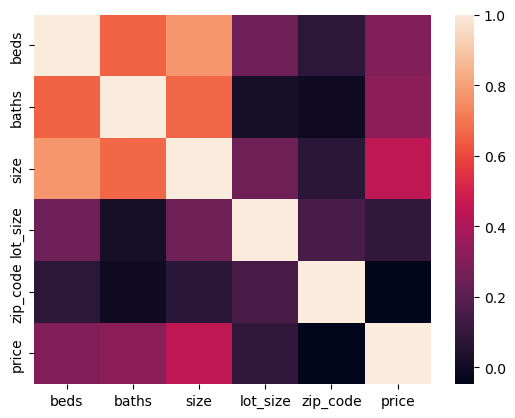

In [203]:
sns.heatmap(train1_imputed.corr())

In [204]:
test = pd.read_csv("/Users/tientran/Downloads/HousePricePrediction/test.csv")
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [205]:
test.value_counts()

beds  baths  size    size_units  lot_size  lot_size_units  zip_code  price    
1     1.0    376.0   sqft        0.23      acre            98199     1000000.0    2
4     2.0    1840.0  sqft        7335.00   sqft            98108     640000.0     1
             1740.0  sqft        3605.00   sqft            98103     950000.0     1
             1690.0  sqft        0.32      acre            98168     550000.0     1
             1670.0  sqft        9800.00   sqft            98125     960000.0     1
                                                                                 ..
3     1.5    2280.0  sqft        5400.00   sqft            98119     1610000.0    1
             1920.0  sqft        4000.00   sqft            98199     975000.0     1
             1892.0  sqft        1.08      acre            98112     692500.0     1
             1833.0  sqft        2114.00   sqft            98122     985000.0     1
9     6.0    6139.0  sqft        5750.00   sqft            98116     2800000.0   

In [206]:
# Convert acre to sqft for test.csv

def acre_to_sqft1(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']

In [207]:
test['lot_size'] = test.apply(acre_to_sqft1, axis = 1)
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0


In [208]:
test.isna().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [209]:
# Impute missing values in the 'lot_size' column

size_imputer = SimpleImputer(strategy = 'mean')

test['lot_size'] = size_imputer.fit_transform(test[['lot_size']])
test.to_csv('test_imputed.csv', index = False)         # Save it into a new csv file

test_imputed = pd.read_csv("/Users/tientran/Downloads/HousePricePrediction/test_imputed.csv")

test_imputed.head()


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0


In [210]:
test_imputed = test_imputed.drop(['size_units', 'lot_size_units'], axis = 1)  # Drop the unit columns
test_imputed.isna().sum()    # test_imputed is our final test data, and now is ready to go

beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64

In [211]:
# Building a linear regression model 

In [212]:
y = train1_imputed['price']      # Price 'train' data
y_test = test_imputed['price']   # Price 'test' data

In [213]:
# Dependent variables
features_to_use = ['beds', 'baths', 'size']

X = train1_imputed[features_to_use]
X_test = test_imputed[features_to_use]

In [214]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [215]:
# Predicting the test set result
y_pred = model.predict(X_test)

model.coef_     # m value based on the model. y = 'm'x + b

array([-110762.20964135,   69757.94872335,     521.61331344])

In [216]:
model.intercept_   # b value

224083.13647406804

In [219]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

53.1294797423564

zip_code
98103    48
98115    39
98117    38
98125    29
98122    29
98199    25
98126    22
98144    21
98118    20
98102    19
98119    19
98136    17
98107    17
98178    16
98146    15
98106    15
98105    15
98121    14
98109    13
98108    13
98116    12
98112    12
98133    12
98177     8
98168     7
98101     5
98104     3
98164     1
98188     1
dtype: int64